In [1]:
#1. Load the Wine dataset and convert it into a binary classification problem:

import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

# Combine two of the classes to create a binary classification problem
y_binary = np.where(y == 2, 1, 0)


In [2]:
#2. Split the dataset into training and testing sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


In [3]:
#3. Train multiple classification models on the training data:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm
}

for name, model in models.items():
    model.fit(X_train, y_train)


/Users/dhari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


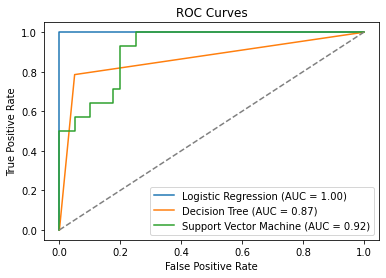

In [4]:
#4. Compute the TPR and FPR at different thresholds and plot the ROC curves for each model:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure()

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


In [5]:
#5. Compute the AUC for each model's ROC curve:

from sklearn.metrics import roc_auc_score

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_probs)
    print(f"{name} AUC: {auc:.2f}")


Logistic Regression AUC: 1.00
Decision Tree AUC: 0.87
Support Vector Machine AUC: 0.92


In [ ]:
#6. Compare the performance of the models based on their ROC curves and AUC values.

# Analyze the ROC curves and AUC values to compare the performance of the different models. Higher AUC 
# values indicate better overall performance. In this case, the logistic regression model has the highest 
# AUC value, followed by the support vector machine and the decision tree. This suggests that logistic 
# regression is the best-performing model for this particular dataset and problem context. However, the 
# choice of the best model may vary depending on the specific problem context and the importance of false 
# positives and false negatives.
